# Defiine params and lib

In [1]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [2]:
# Parameters
input_size = (224,224)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
labels = ['Keriting', 'Kuning', 'Layu']

# Define preprocess function

In [3]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

# Load Model Langsung Kesini aja

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

# Define the swish activation function
def swish(x):
    return x * tf.keras.backend.sigmoid(x)

# Define or import your FixedDropout layer here if needed
class FixedDropout(tf.keras.layers.Dropout):
    # Custom implementation or just inherit Dropout
    pass

# Define the input size based on the model's expected input dimensions
input_size = (224, 224)  # Sesuaikan dengan input size yang diharapkan model Anda

# Load the model
MODEL_PATH = 'model/CNN_train_v1.h5'
# MODEL_PATH = 'best_model.keras'

try:
    model = load_model(MODEL_PATH, compile=False, custom_objects={'swish': swish, 'FixedDropout': FixedDropout})
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading the model:", e)

# Define preprocess function
def preprocess(image, input_size):
    # Resize image to match input size
    image = image.resize(input_size)
    # Convert image to numpy array and normalize to [0, 1]
    image = np.array(image).astype(np.float32) / 255.0
    # Add batch dimension for model prediction
    return np.expand_dims(image, axis=0)

# Load and preprocess the image
im = Image.open('test/1.png')
X = preprocess(im, input_size)  # Preprocess the image

# Predict with the model
y = model.predict(X)

# Assuming labels list is defined (e.g., labels = ["label_1", "label_2", "label_3"])
labels = ['Keriting', 'Kuning', 'Layu']  # Sesuaikan dengan label model Anda

# Print prediction result
print("Predicted label:", labels[np.argmax(y)], "Confidence:", np.max(y))


# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


Model loaded successfully.


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (1, 224, 224, 4)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 4), dtype=float32)
  • training=False
  • mask=None

Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Predicted label: Keriting
Confidence: 99.66642260551453 %
Class probabilities:
Keriting: 99.67%
Kuning: 0.00%
Layu: 0.33%


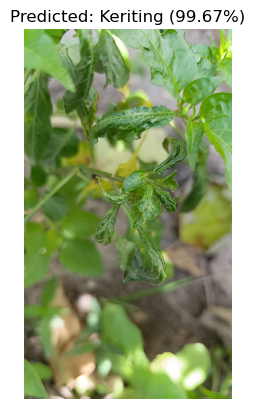

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the swish activation function
def swish(x):
    return x * tf.keras.backend.sigmoid(x)

# Define or import your FixedDropout layer here if needed
class FixedDropout(tf.keras.layers.Dropout):
    # Custom implementation or just inherit Dropout
    pass

# Define the input size based on the model's expected input dimensions
input_size = (224, 224)  # Sesuaikan dengan input size yang diharapkan model Anda

# Load the model
MODEL_PATH = 'model/CNN_train_v1.h5'

try:
    model = load_model(MODEL_PATH, compile=False, custom_objects={'swish': swish, 'FixedDropout': FixedDropout})
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading the model:", e)
    exit()

# Define preprocess function
def preprocess(image, input_size):
    # Resize image to match input size
    image = image.resize(input_size)
    # Convert image to numpy array and normalize to [0, 1]
    image = np.array(image).astype(np.float32) / 255.0
    # Add batch dimension for model prediction
    return np.expand_dims(image, axis=0)

# Load and preprocess the image
image_path = 'test/leafcurl/k2.jpg'
try:
    im = Image.open(image_path)
except Exception as e:
    print("Error loading the image:", e)
    exit()

X = preprocess(im, input_size)  # Preprocess the image

# Predict with the model
y = model.predict(X)

# Assuming labels list is defined
labels = ['Keriting', 'Kuning', 'Layu']  # Sesuaikan dengan label model Anda

# Get predicted label and confidence
predicted_label = labels[np.argmax(y)]
confidence = np.max(y) * 100  # Convert to percentage

# Print prediction results
print("Predicted label:", predicted_label)
print("Confidence:", confidence, "%")
print("Class probabilities:")
for i, label in enumerate(labels):
    print(f"{label}: {y[0][i] * 100:.2f}%")

# Display the image with prediction
plt.imshow(im)
plt.axis('off')
plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
plt.show()
